In [ ]:
import pandas as pd

df = pd.read_csv(r"D:\smartfarm\Synthesized Dataset Bean sprount.csv")
df.head()

,soaking_hours,temperature_celsius,watering_per_day,light_exposure,days_to_harvest,yield_grams,quality
0,8.2,28.1,4,0,3,810,High
1,4.5,23.5,2,1,4,465,Low
2,6.7,26.7,3,0,3,788,High
3,10.1,32.8,5,0,3,690,Medium
4,7.5,25.4,4,0,3,805,High


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   soaking_hours        437 non-null    float64
 1   temperature_celsius  437 non-null    float64
 2   watering_per_day     437 non-null    int64  
 3   light_exposure       437 non-null    int64  
 4   days_to_harvest      437 non-null    int64  
 5   yield_grams          437 non-null    object 
 6   quality              436 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 24.0+ KB


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# เลือกเฉพาะคอลัมน์ที่เป็น object/string
categorical_cols = df.select_dtypes(include='object').columns

# แปลงด้วย OrdinalEncoder
encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

df.head()


,soaking_hours,temperature_celsius,watering_per_day,light_exposure,days_to_harvest,yield_grams,quality
0,8.2,28.1,4,0,3,119.0,0.0
1,4.5,23.5,2,1,4,6.0,1.0
2,6.7,26.7,3,0,3,97.0,0.0
3,10.1,32.8,5,0,3,53.0,2.0
4,7.5,25.4,4,0,3,114.0,0.0


In [15]:
df = df.dropna()
df.isnull().sum()

soaking_hours          0
temperature_celsius    0
watering_per_day       0
light_exposure         0
days_to_harvest        0
yield_grams            0
quality                0
dtype: int64

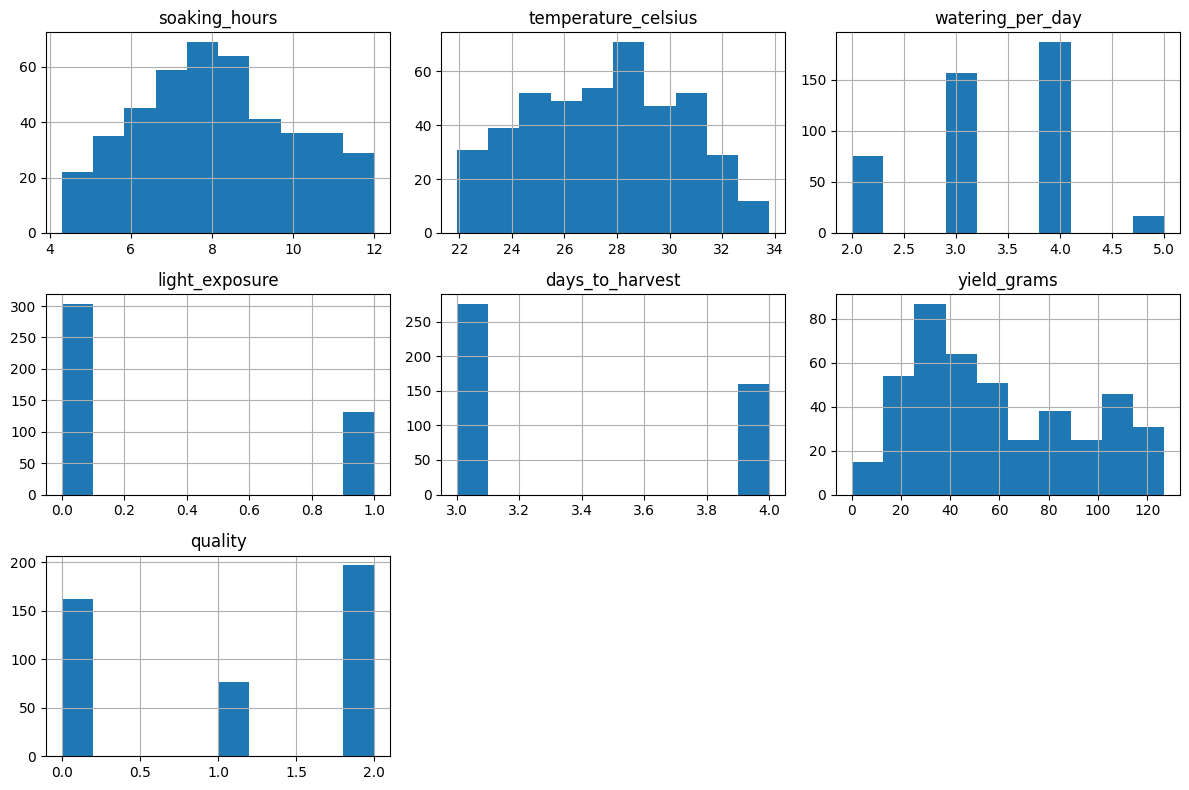

In [16]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('light_exposure', axis=1)
y = df['light_exposure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.10285663933867854


In [21]:
score = model.score(X_test, y_test)
print("R^2 Score:", score)

R^2 Score: 0.525879872000758
